In [ ]:
Ana Carolina Delena Cury - Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('titanic.csv')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [8]:
total_passengers, male_percentage, survival_percentage = (
    len(df),
    (df['Sex'].value_counts(normalize=True).get('male', 0) * 100),
    (df['Survived'].value_counts(normalize=True).get(1, 0) * 100)
)

(total_passengers, male_percentage, survival_percentage)

(891, 0, 38.38383838383838)

Your written answer:

 - 891
 - 0
 - 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [10]:
female_survival_percentage = (df[df['Sex'] == 'female']['Survived'].mean() * 100)
male_survival_percentage = (df[df['Sex'] == 'male']['Survived'].mean() * 100)


(female_survival_percentage, male_survival_percentage)

(nan, nan)

Your written answer:

 - nan
 - nan

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [12]:
ticket_stats = df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),
    survival_percentage=('Survived', 'mean')
)


total_passengers = len(df)
ticket_stats['ticket_percentage'] = (ticket_stats['total_tickets'] / total_passengers) * 100


ticket_stats['survival_percentage'] *= 100  
ticket_stats = ticket_stats[['total_tickets', 'ticket_percentage', 'survival_percentage']]
print(ticket_stats)

        total_tickets  ticket_percentage  survival_percentage
Pclass                                                       
1                 216          24.242424            62.962963
2                 184          20.650954            47.282609
3                 491          55.106622            24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.242424%
    - % survivorship: 62.962963%
- Class 2 
    - % tickets: 20.650954%
    - % survivorship: 47.282609%
- Class 3
    - % tickets: 55.106622%
    - % survivorship: 24.236253%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [26]:
survivors_df = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]


print("Survivors DataFrame:")
print(survivors_df.head())

print("\nNon-Survivors DataFrame:")
print(non_survivors_df.head())

Survivors DataFrame:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


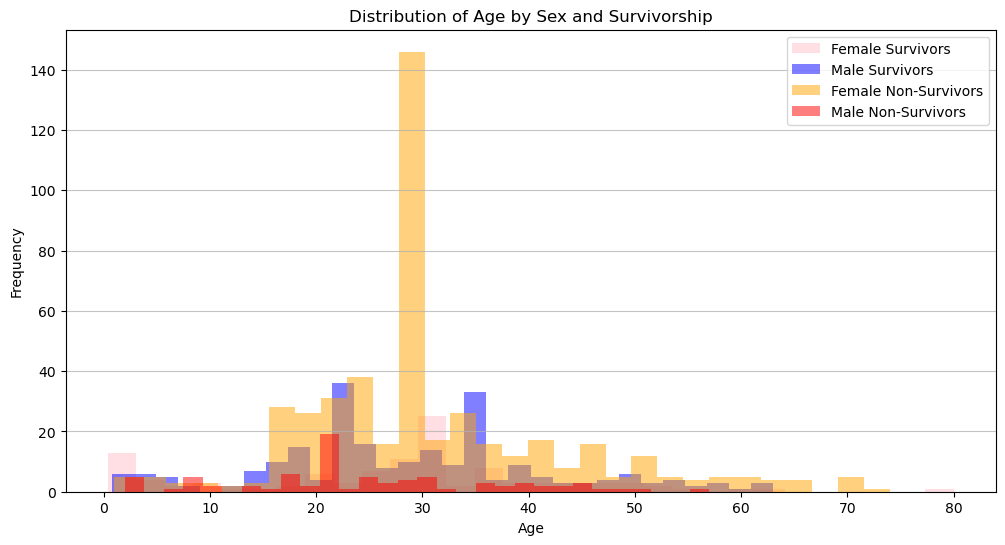

In [28]:
plt.figure(figsize=(12, 6))


plt.hist(survivors_df[survivors_df['Sex'] == 1]['Age'], 
         bins=30, alpha=0.5, color='pink', label='Female Survivors', histtype='stepfilled')
plt.hist(survivors_df[survivors_df['Sex'] == 0]['Age'], 
         bins=30, alpha=0.5, color='blue', label='Male Survivors', histtype='stepfilled')
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 1]['Age'], 
         bins=30, alpha=0.5, color='orange', label='Female Non-Survivors', histtype='stepfilled')
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 0]['Age'], 
         bins=30, alpha=0.5, color='red', label='Male Non-Survivors', histtype='stepfilled')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Sex and Survivorship')
plt.legend()
plt.grid(axis='y', alpha=0.75)


plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

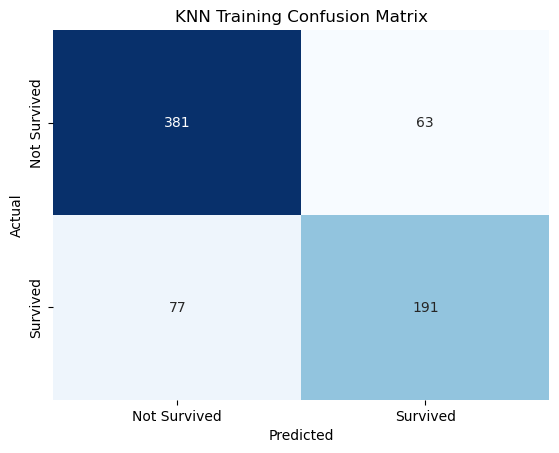

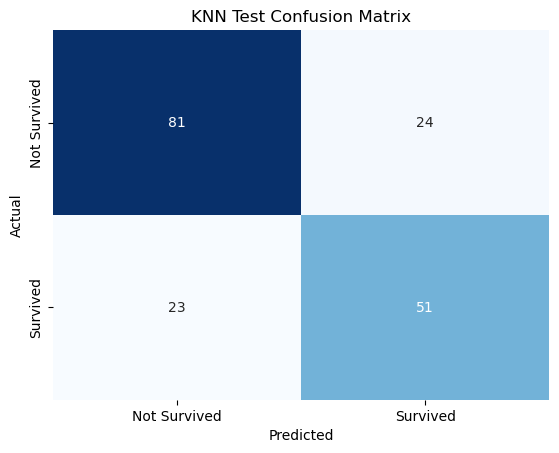

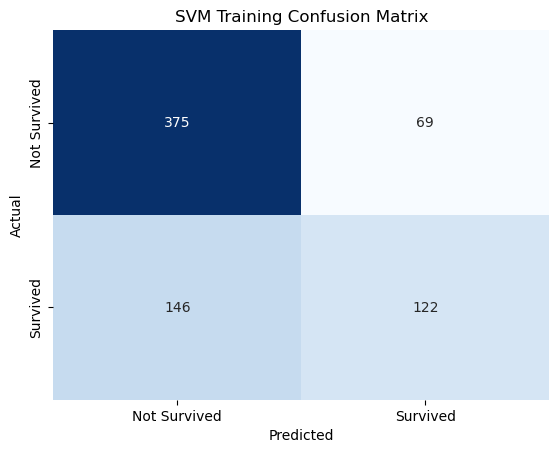

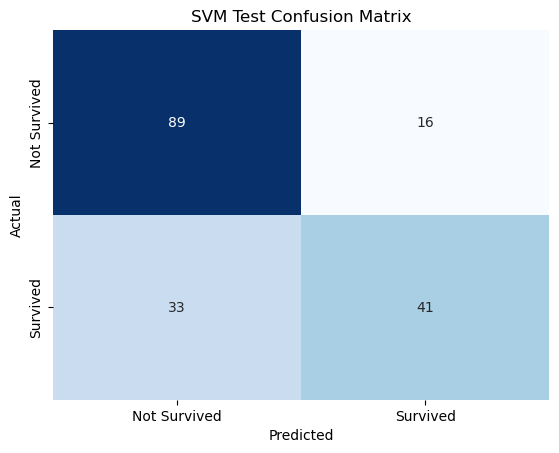

KNN Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       105
           1       0.68      0.69      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

SVM Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       105
           1       0.72      0.55      0.63        74

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].fillna(0)  # Fill NaN values with 0 for simplicity
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) 

svm = SVC(kernel='linear', C=1.0)  

knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

knn_train_pred = knn.predict(X_train_scaled)
knn_test_pred = knn.predict(X_test_scaled)

svm_train_pred = svm.predict(X_train_scaled)
svm_test_pred = svm.predict(X_test_scaled)

knn_train_cm = confusion_matrix(y_train, knn_train_pred)
knn_test_cm = confusion_matrix(y_test, knn_test_pred)

svm_train_cm = confusion_matrix(y_train, svm_train_pred)
svm_test_cm = confusion_matrix(y_test, svm_test_pred)

def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Not Survived', 'Survived'], 
                yticklabels=['Not Survived', 'Survived'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(knn_train_cm, 'KNN Training Confusion Matrix')
plot_confusion_matrix(knn_test_cm, 'KNN Test Confusion Matrix')
plot_confusion_matrix(svm_train_cm, 'SVM Training Confusion Matrix')
plot_confusion_matrix(svm_test_cm, 'SVM Test Confusion Matrix')

print("KNN Classification Report (Test Data):")
print(classification_report(y_test, knn_test_pred))

print("SVM Classification Report (Test Data):")
print(classification_report(y_test, svm_test_pred))

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The performance of the K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models on the test data is slightly lower than on the training data, which is expected as models often perform better on the data they were trained on.


Which models did you fit and which worked better?
 
 - I fitted two models, KNN and SVM. When comparing their performances on the data sets, we can see that KNN had an accuracy of 74%, with slightly better F1-scores for both classes, and a balanced recall for both classes as well. On the other hand, while SVM presented a slightly lower accuracy of 73%, it had unbalanced recall results between different classes (0.85 and 0.55). Overall, KNN performed a little bit better, specially when it comes to identifying different classes more consistently. 